In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=10).fit(X)
print("Cluster centers:\n", clustering.cluster_centers_)
clustering.labels_

Cluster centers:
 [[ 59.43902439  47.73170732]
 [ 49.67647059  50.94117647]
 [ 77.53846154  90.84615385]
 [ 83.58333333  16.5       ]
 [ 75.58333333   8.25      ]
 [ 75.5         75.16666667]
 [ 21.36363636  75.36363636]
 [ 21.66666667   8.88888889]
 [ 95.          89.14285714]
 [ 22.42857143  34.42857143]
 [ 35.          31.33333333]
 [ 99.6         18.6       ]
 [ 32.2         86.8       ]
 [100.          29.5       ]
 [ 33.          17.75      ]
 [ 20.          97.        ]
 [123.          76.5       ]
 [102.          68.5       ]
 [137.          83.        ]
 [137.          18.        ]
 [126.          28.        ]
 [120.          16.        ]
 [113.          91.        ]
 [113.           8.        ]]


array([ 9,  6,  7,  6,  9,  6,  7, 15,  7,  6,  7, 15,  7,  6,  7,  6,  9,
        6,  9, 15,  9,  6,  7,  6, 14, 12,  9,  6, 10, 12,  7,  6,  7, 12,
       14, 12, 14,  6, 10, 12, 10, 12, 10,  1, 10,  1,  1,  1, 10, 10,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  3,  5,  0,  2,  4,  5,  4,  5,  0,  5,  4,  2,
        4,  5,  4,  5,  4,  2,  0,  2,  4,  2,  3,  5,  3,  2,  3,  2,  3,
        5,  3,  2,  4,  5,  4,  5,  3,  2,  4,  2,  3,  5,  3,  2,  3, 17,
        3,  5,  3,  8,  3,  8,  3,  5, 11,  8, 13,  8, 11,  8, 13,  8, 11,
       17, 11,  8, 11, 17, 23, 22, 21, 16, 20, 16, 19, 18])

In [6]:
supervised=pd.DataFrame(dataset)

supervised['Cluster_group']=clustering.labels_

supervised


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,9
1,2,Male,21,15,81,6
2,3,Female,20,16,6,7
3,4,Female,23,16,77,6
4,5,Female,31,17,40,9
...,...,...,...,...,...,...
195,196,Female,35,120,79,16
196,197,Female,45,126,28,20
197,198,Male,32,126,74,16
198,199,Male,32,137,18,19


/opt/anaconda3/envs/AIML/lib/python3.13/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


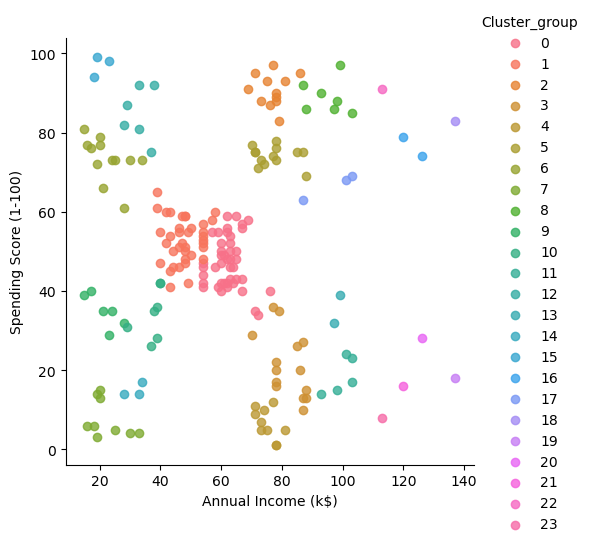

In [7]:
import seaborn as sns

facet=sns.lmplot(data=supervised , x=supervised.columns[3] ,y=supervised.columns[4] , hue=supervised.columns[5],
                 fit_reg=False , legend=True , legend_out=True)

In [8]:
####### Bandwidth increases : Number of cluster groups decrease significantly and plateaus at a specific number , for this dataset its 18 


##### Bandwidth 1 : Cluster groups = 171
##### Bandwidth 5 : Cluster groups = 66
##### Bandwidth 10 : CLuster groups = 23 